<a href="https://colab.research.google.com/github/eduardocorrearaujo/Projeto---Dados-Airbnb-Rio-de-Janeiro/blob/master/Proj_Analisando_os_Dados_do_Airbnb_(Rio_de_Janeiro).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Análise dos Dados do Airbnb - *Rio de Janeiro, Brazil*

O [Airbnb](https://www.airbnb.com.br/) é um serviço online nos quais as pessoas podem anunciar seus imóveis, casas, apartamentos ou parte deles, como apenas um quarto para serem alugados por um período de tempo.

Por oferecer hospedagens mais baratas, quando comparado com redes de hotéis e pousadas e permitir que o dono de um imóvel faça uma renda extra o Airbnb se espalhou por várias cidades do mundo. Apesar de haver resistência em alguns locais, com o argumento que ele pode prejudicar a rede hoteleira, o site continua em funcionamento. 

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Esses dados podem ser acessados em [Inside Airbnb](http://insideairbnb.com/get-the-data.html).
<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir dos dados diponíveis.**

## Obtenção dos Dados


In [37]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline
%config lnlineBackend.figure_format = 'svg'


Os dados utilizados nessa análise podem ser encontrados [nesse link](http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv). Abaixo irei importar esse conjunto de dados. 

In [38]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv")

## Análise dos Dados

Nessa análise iremos trabalhar com os dados reduzidos. Abaixo há uma descrição de todas as variáveis do nosso *DataFrame*. 


**Dicionário das variáveis**

* `id` - Número de id gerado para identificar o imóvel.
* `name` - Nome da propriedade anunciada.
* `host_id` - Número de id do proprietário (anfitrião) da propriedade.
* `host_name` - Nome do anfitrião.
* `neighbourhood_group` - Esta coluna não contém nenhum valor válido.
* `neighbourhood` - Nome do bairro.
* `latitude` - Coordenada da latitude da propriedade.
* `longitude` - coordenada da logintude da propriedade.
* `room_type` - Informa o tipo de quarto que é oferecido.
* `price` - Preço para alugar o imóvel.
* `minimum_nights` - quantidade mínima de noites para reservar.
* `number_of_reviews`- Número de reviews que a propriedade possui.
* `last_review` - Data do último review.
* `reviews_per_month` - Quantidade de reviews por mês.
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião.
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias.


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [39]:
# mostrar as 5 primeiras entradas
df.head()

#o valor dentro do parênteses indica o número de entradas que irão aparecer. 
# quando nenhur valor digitado ele assume que esse valor é 5 por default.
#Para printar as 5 últimas entradas digite 'df.tail()', do mesmo modo o valor 
#dentro do parênteses indica o número de entradas que irão aparecer.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,2020-04-06,2.11,1,0
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,2020-03-22,1.25,1,69
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,2020-02-15,1.98,3,95
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,2020-03-02,2.37,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,2020-03-15,2.29,1,358


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos identificar quais são as variáveis e quantas são as entradas de nosso conjunto de dados. 

É muito importante verificar qual é o tipo de variáveis, visto que dependendo da análise desejada pode ser necessário alterá-la. Como, por exemplo, transformar uma variável `int` no tipo `float`.

In [40]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n". format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 35870
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas. Esse fator afeta diretamente a qualidade da análise.


In [41]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.411653
last_review                       0.411653
name                              0.001617
host_name                         0.000139
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Veja que a coluna `neighbourhood_group` possui todos os seus valores nulos, logo não é relevante analisá-la, assim irei removê-la do *DataFrame*. Além disso, as colunas last_review e reviews_per_month possuem cerca de 40% dos dados ausentes, logo esses dados são muito menos confiáveis que os outros, portanto, se forem analisados, essa análise deve ser feita com mais cuidado.

In [42]:
df = df.drop("neighbourhood_group", axis = 1)

### **Q3. Qual o tipo de distribuição das variáveis?** 

Através do histograma conseguimos obter um ideia da distribuição de cada uma das variáveis. Além disso, podemos observar a presença de *outliers* em nossos dados.

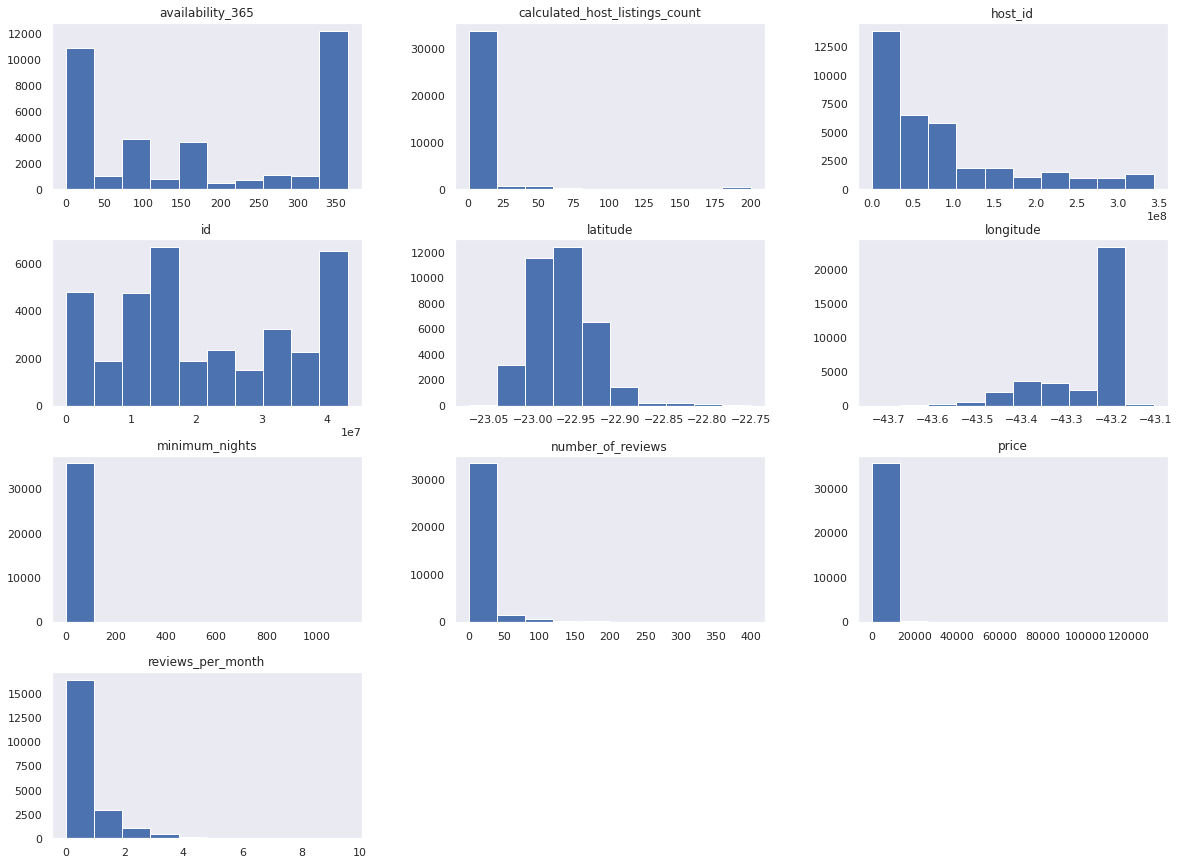

In [43]:
# plotar o histograma das variáveis numéricas
df.hist(figsize=(20,15), grid=False);

### **Q4. Há *outliers* presentes?**


**Outliers** são valores aberrantes, atípicos quando comparados com os valores de uma variável.

Analisando o histograma acima, podemos observar que para a variável `minimum_nights` que representa o mínimo de noites para se reservar, chega a cerca de 1000 dias, o que não é comum, já que normalmente as pessoas buscam o Airbnb para utilizar o imóvel durante um curto período de tempo. Logo, esse valor alto para o mínimo de noites nos indica a presença de *outliers* nessa variável.

Ademais, analisando a variável price, podemos observar que ela chega a algo próximo de 125000,00 R$, o que também indica a presença de *outliers*, já que outro motivo da procura do Airbnb é ter preços mais baixos que outras opções de hospedagem. 

Vamos agora tratar os outliers dessas duas variáveis. 

Podemos ver um **resumo estatístico** dessas variáveis utilizando o método `describe()`. Fazendo isso para as duas variáveis obtemos o seguinte resultado:

In [44]:
# ver o resumo estatístico dessas duas variáveis numéricas
df[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,35870.000000,35870.000000
mean,753.686367,4.781851
std,2229.366334,22.471085
min,0.000000,1.000000
25%,158.000000,1.000000
50%,298.000000,2.000000
75%,632.000000,4.000000
max,131727.000000,1123.000000


Através do resumo estatístico mostrado acima podemos observar que 75% dos valores da variável `price` estão abaixo de 632, porém o seu valor máximo é 131727. Para a variável `minimum_nights`, 75% dos seus valores estão abaixo de 4, porém seu valor máximo é 1123. Observe que esses valores máximos representam **outliers**, já ques são valores muito distantes da grande maioria dos valores.

Para visualizar os *outliers* podemos gerar um **boxplot** da variável. Vamos analisar primeiramente a váriavel `price`. O boxplot é um gráfico que nos permite visualizar a distribuição dos dados. A partir deles conseguimos visualizar os outliers.

Boxplot para a variável `price`.

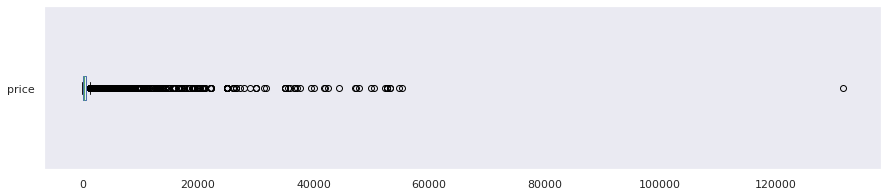

In [45]:
df.price.plot(kind = 'box', vert= False, showfliers=True,figsize=(15,3), grid = False)

Todos os pontos pretos representam os outliers utilizando a análise do boxplot. Para visualizar o boxplot sem os outliers podemos adicionar o comando `showfliers = False` na função plot.

Boxplot sem os **outliers**.

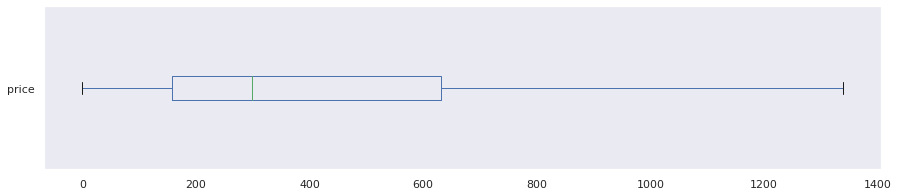

In [46]:
df.price.plot(kind = 'box', vert= False, showfliers=False,figsize=(15,3), grid= False);

Podemos calcular os limites definidos pelo boxplot para eliminar os outliers. 

In [47]:
# calculando os quartis
q1_price = df.price.quantile(.25) # primeiro quartil
q3_price = df.price.quantile(.75) # terceiro quartil
IQR_price = q3_price - q1_price

#definindo os limites
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price:', sup_price)
print('Limite inferior de price:', inf_price)





Limite superior de price: 1343.0
Limite inferior de price: -553.0


O limite superior definido pelo boxplot é 1343, assim, irei eliminar da coluna `price` todos os valores superiores a 1343. Não iremos trabalhar com o limite inferior já que os dados da vairável `price` são todos positivos.

In [48]:
# eliminando os outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1343.0].index, axis = 0, inplace = True)
# removendo valores nulos
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis = 0, inplace = True)


Veja que agora podemos extrair informações da distribuição dessa variável plotando o seu histograma


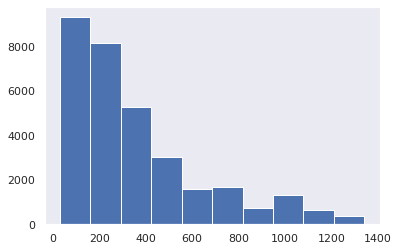

In [49]:
df_clean.price.hist(grid=False)

sns.set_style()
plt.show()

Assim, podemos observar que a maior parte dos imóveis tem uma diária de até 400,00R$.

Iremos analisar agora a variável `minimum_nights`.

Iremos proceder de maneira análoga ao que fizemos com a variável `price`.

Plotando o boxplot encontramos:

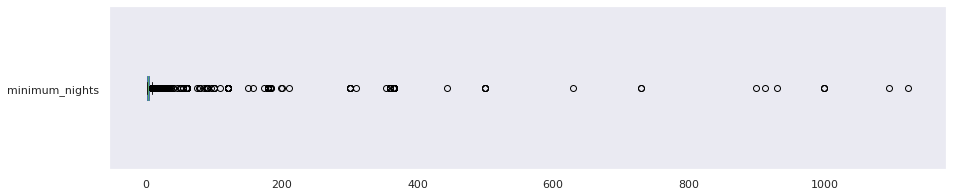

In [50]:
df.minimum_nights.plot(kind = 'box', vert= False, showfliers=True,figsize=(15,3), grid = False)

Para não visualizar os outliers vamos usar o comando `showfliers = False`.

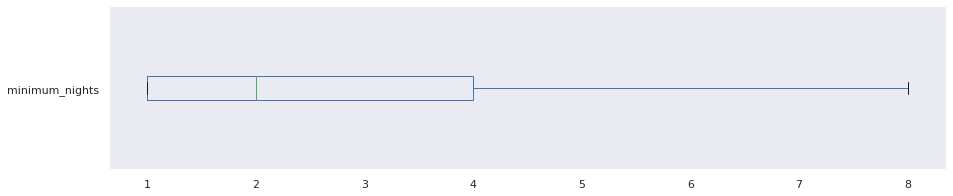

In [51]:
df.minimum_nights.plot(kind = 'box', vert= False, showfliers=False,figsize=(15,3), grid = False)

Calculando os limites definidos pelo boxplot.

In [52]:
# calculando os quartis
q1_minimum_nights = df.minimum_nights.quantile(.25) # primeiro quartil
q3_minimum_nights = df.minimum_nights.quantile(.75) # terceiro quartil

IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights

# definindo os valores superiores e inferiores
sup_minimum_nights = q3_minimum_nights + 1.5* IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior:' ,sup_minimum_nights)
print('Limite inferior:' ,inf_minimum_nights)

Limite superior: 8.5
Limite inferior: -3.5


Iremos agora eliminar os outliers, que são os dados maiores que o limite superior expresso pelo boxplot.

In [53]:
# Eliminando os outliers da variável 'minimum_nights'.
df_clean.drop(df_clean[df_clean.minimum_nights > 8.5].index, axis = 0, inplace = True)


Plotando o histograma da variável `minimum_nights` agora:


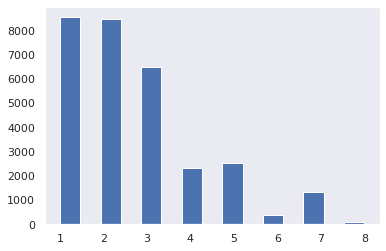

In [54]:
df_clean.minimum_nights.hist(bins=15, grid=False);


Assim podemos observar que na maior parte dos imóveis o tempo mínimo de dias é de até 3 dias. O que não conseguíamos observar no histograma com os *outliers*.


### **Q5. Qual a média dos preços de aluguel?**

In [55]:
# ver a média da coluna `price``
print('O preço médio é: %i'  %df.price.mean())
print('A mediana dos preços é:%i' %df.price.median())
print('O preço médio sem os outliers é:%i ' %df_clean.price.mean())
print('A mediana dos preços sem os outliers é:%i' %df_clean.price.median())



O preço médio é: 753
A mediana dos preços é:298
O preço médio sem os outliers é:350 
A mediana dos preços sem os outliers é:250


### **Q6. Qual a correlação existente entre as variáveis**

Para visualizar qual a correlação entre as variáveis de um *DataFrame*, podemos plotar um heatmap a partir da matriz de correlação das variáveis.

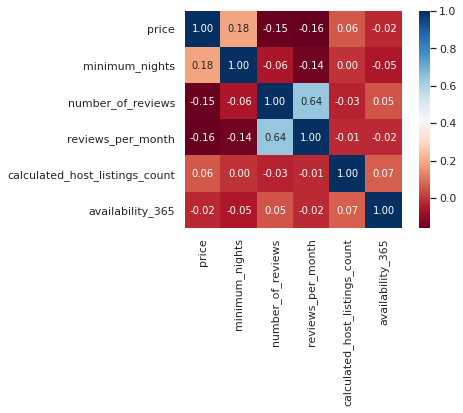

In [56]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
#display(corr)

# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Através do heatmap acima podemos observar que não há correlação significativa entre essas variáveis.

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

Para saber qual é o imóvel mais alugado no Airbnb podemos utilizar o método `value_counts()` na variável `room_type`.

In [57]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    20593
Private room        8647
Shared room          721
Hotel room           156
Name: room_type, dtype: int64

A partir do resultado acima vemos que o imóvel mais alugado é o `Entire home/apt`. Que representa a casa ou apartamento inteiro.

Podemos também ver a porcentagem referente a cada um desses tipos de imóveis.

In [58]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.683767
Private room       0.287114
Shared room        0.023940
Hotel room         0.005180
Name: room_type, dtype: float64

### **Q8 Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [59]:
# ver a média da coluna `minimum_nights`
print('Média das noites mínimas de aluguel',df_clean.minimum_nights.mean())
print('Mediana das noites mínimas de aluguel', df_clean.minimum_nights.median())

Média das noites mínimas de aluguel 2.6225387654812895
Mediana das noites mínimas de aluguel 2.0


Assim, arredondando, a média do mínimo de noites e de aproximadamente 3.

Podemos também plotar os imóveis pela latitude e longitude para observar a distribuição geogáfica dos imóveis. As cores são definidas de acordo com o seu preço de aluguel.

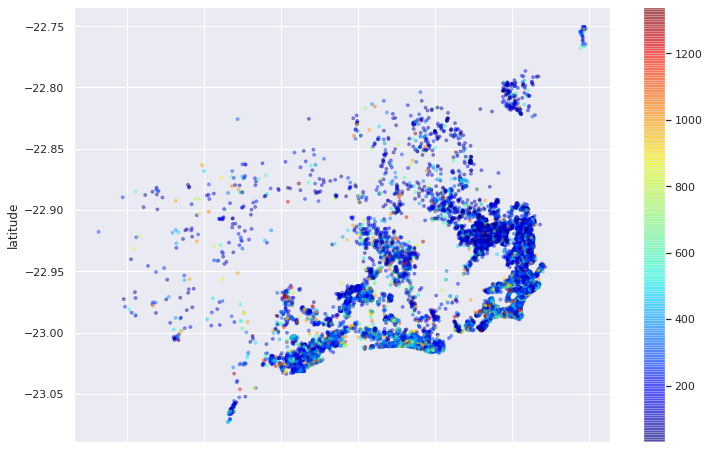

In [60]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind = "scatter", x = 'longitude', y = 'latitude', alpha = 0.4, c = df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));
               


### Preço médio por bairro


Uma forma de saber o preço médio por bairro é utilizar o comando `groupby()`. O utilizando na coluna `neighbourhood` que representa os  bairros obtemos o seguinte resultado:

In [61]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vaz Lobo                  649.000000
Ricardo de Albuquerque    601.200000
Lagoa                     495.940199
Deodoro                   474.000000
Inhoaíba                  466.000000
Leblon                    462.512048
Pedra de Guaratiba        454.714286
Ipanema                   442.127791
Pavuna                    436.000000
Barra da Tijuca           431.110730
Name: price, dtype: float64

Contudo, essas informações realmente são condizentes com a realidade? Vaz Lobo é o bairro mais caro do Rio de Janeiro? Sabemos que a resposta para essa pergunta é não. Uma forma de saber isso é utilizar ao invés do método `mean()`, que nesse caso nos fornece o preço médio, utilizar o método `describe()`, que nos fornece a média e outras informações estatíticas interessantes. Veja abaixo qual seria o **resultado** utilizando o método `describe()`.

In [62]:
describem = df_clean.groupby(['neighbourhood']).price.describe().sort_values(by = 'mean', ascending = False )[0:10].copy()

#describe.drop('25%', axis = 1, inplace = True)
describem.rename(columns={'std': 'Desvio-Padrão', 'mean': 'Valor médio', 'count': 'Nº de imóveis'}, inplace = True)
describem.head(10)

,Nº de imóveis,Valor médio,Desvio-Padrão,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Vaz Lobo,2.0,649.000000,496.388960,298.0,473.5,649.0,824.5,1000.0
Ricardo de Albuquerque,5.0,601.200000,418.323679,122.0,298.0,523.0,1000.0,1063.0
Lagoa,301.0,495.940199,342.247634,58.0,218.0,393.0,702.0,1317.0
Deodoro,2.0,474.000000,388.908730,199.0,336.5,474.0,611.5,749.0
Inhoaíba,3.0,466.000000,517.550964,144.0,167.5,191.0,627.0,1063.0
Leblon,1328.0,462.512048,279.424462,52.0,250.0,400.0,601.0,1340.0
Pedra de Guaratiba,14.0,454.714286,430.695221,58.0,130.0,308.5,651.0,1309.0
Ipanema,2598.0,442.127791,289.833521,32.0,221.0,348.0,600.0,1333.0
Pavuna,5.0,436.000000,363.857115,133.0,250.0,351.0,383.0,1063.0


Observe que apesar de Vaz Lobo ter o maior preço médio, há apenas dois imóveis nesse local, logo, como não temos uma grande quantidade de imóveis o preço médio não nos fornece uma informação significativa. Veja que analisando o preço máximo, Ipanema tem um preço máximo consideravelmente maior. 

Sendo assim, como um número maior de imóveis nos fornece informações mais confiáveis sobre os dados, podemos ordenar o dataframe dos bairros, pelo número de imóveis em cada bairro e depois ordená-los pelo preço médio. Assim, obtemos o resultado abaixo:

In [68]:
describec = df_clean.groupby(['neighbourhood']).price.describe().sort_values(by = 'count', ascending = False )[0:10].copy()

#describe.drop('25%', axis = 1, inplace = True)
describec.rename(columns={'std': 'Desvio-Padrão', 'mean': 'Valor médio', 'count': 'Nº de imóveis'}, inplace = True)
describec.sort_values(by = "Valor médio", ascending = False).head(10)

,Nº de imóveis,Valor médio,Desvio-Padrão,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Leblon,1328.0,462.512048,279.424462,52.0,250.00,400.0,601.0,1340.0
Ipanema,2598.0,442.127791,289.833521,32.0,221.00,348.0,600.0,1333.0
Barra da Tijuca,2917.0,431.110730,300.930336,43.0,202.00,330.0,585.0,1329.0
Jacarepaguá,1495.0,397.442140,314.617888,42.0,149.00,290.0,548.0,1329.0
Recreio dos Bandeirantes,1288.0,396.519410,304.432402,31.0,162.75,298.0,502.0,1329.0
Copacabana,8484.0,330.948845,253.894901,32.0,153.00,248.0,400.0,1329.0
Botafogo,1574.0,299.998729,253.532650,37.0,123.00,202.0,398.0,1329.0
Flamengo,789.0,291.475285,248.674141,37.0,121.00,200.0,369.0,1317.0
Santa Teresa,1069.0,238.663237,210.985899,37.0,100.00,169.0,298.0,1329.0


Com essa análise observe que o bairro indicado com o maior preço médio é o Leblon. Um fator relevante a ser observado é que nesse caso o **desvio-padrão** é menor do que na análise anterior, o que indica que essa análise descreve melhor a tendência de preços do bairro, visto que, o desvio-padrão é,  basicamente, uma medida de dispersão dos valores ao redor da média. Assim,  quanto menor o desvio padrão, melhor a média descreve o comportamento de uma variável. 

Ainda assim, é importante destacar que essa análise não é conclusiva.

## Conclusões
A partir da análise susperficial realizada foi possível concluir que grande parte dos imóveis disponíveis no Airbnb na cidade do Rio de Janeiro, possuem uma diária de até 400,00 R$ e no mínimo 3 noites mínimas para aluguel.

Além disso, após desconsiderar os outliers, a média do preço de aluguel é 350,00R\$ e a sua mediana é 250,00R\$. Para o número mínimo de noites, a média é de aproximadamente 3 dias e a mediana 2 dias.

Ademais, foi possível observar que o imóvel mais alugado pelo Airbnb no Rio de Janeiro é casa/apartamento inteiro e que o número de amostras é muito importantes ao trabalhar com a média de uma variável.